In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gMobM1 = pd.read_csv(r'data/3. mobilitas global, indo/data for good (meta)/movement-range-data-2020-03-01-2020-12-31/movement-range-data-2020-03-01--2020-12-31.txt', sep="\t")
gMobM2 = pd.read_csv(r'data/3. mobilitas global, indo/data for good (meta)/movement-range-data-2022-05-22/movement-range-2022-05-22.txt', sep="\t")
gMobM2#.info()
#gMobM1.info()
# loadny lama, gakuat 90s++

/Users/owner/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
0,2021-01-01,AGO,GADM,AGO.10.10_1,Lubango,-0.35291,0.25398,full_february,DAY_OF_WEEK
1,2021-01-02,AGO,GADM,AGO.10.10_1,Lubango,-0.06131,0.17330,full_february,DAY_OF_WEEK
2,2021-01-03,AGO,GADM,AGO.10.10_1,Lubango,-0.00392,0.21932,full_february,DAY_OF_WEEK
3,2021-01-04,AGO,GADM,AGO.10.10_1,Lubango,0.15114,0.11662,full_february,DAY_OF_WEEK
4,2021-01-05,AGO,GADM,AGO.10.10_1,Lubango,0.12696,0.10832,full_february,DAY_OF_WEEK
...,...,...,...,...,...,...,...,...,...
6950193,2021-05-20,ZWE,GADM,ZWE.9.1_1,Beitbridge,-0.06120,0.06062,full_february,DAY_OF_WEEK
6950194,2021-05-28,ZWE,GADM,ZWE.9.1_1,Beitbridge,-0.12387,0.09268,full_february,DAY_OF_WEEK
6950195,2021-11-17,ZWE,GADM,ZWE.9.1_1,Beitbridge,-0.29288,0.09892,full_february,DAY_OF_WEEK
6950196,2021-11-23,ZWE,GADM,ZWE.9.1_1,Beitbridge,-0.03101,0.08439,full_february,DAY_OF_WEEK


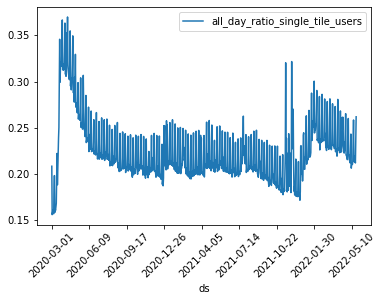

In [21]:
merged = pd.concat([gMobM1.dropna(),gMobM2.dropna()])
merged.groupby("ds")["all_day_ratio_single_tile_users"].mean().reset_index().plot(kind="line", x="ds", y="all_day_ratio_single_tile_users")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# df1 = cleaned gMobM1
# df2 = cleaned gMobM2
# df1["ds"] = pd.DatetimeIndex(df1["ds"])
df1['YM'] = df1['YM'].apply(lambda x: x.strftime('%Y-%m'))
totaldf1 = df1.groupby("YM")["all_day_bing_tiles_visited_relative_change"].<descstat>().reset_index()
totaldf1["all_day_ratio_single_tile_users"] = df1.groupby("YM")["all_day_ratio_single_tile_users"].<descstat>().reset_index()["all_day_ratio_single_tile_users"]
df2['YM'] = df2['YM'].apply(lambda x: x.strftime('%Y-%m'))
totaldf2 = df2.groupby("YM")["all_day_bing_tiles_visited_relative_change"].<descstat>().reset_index()
totaldf2["all_day_ratio_single_tile_users"] = df1.groupby("YM")["all_day_ratio_single_tile_users"].<descstat>().reset_index()["all_day_ratio_single_tile_users"]
# satuin totaldf1 sm 2

In [ ]:
totaldf1.plot(kind = "line", x = "YM", y = ["all_day_bing_tiles_visited_relative_change", "all_day_ratio_single_tile_users"])
plt.title("<jdl>\n", fontsize = 18, color ="blue")
plt.xlabel("YM")
plt.ylabel("Nb")
labels, locations = plt.yticks()
#plt.ylim(ymin = 0)
plt.yticks(labels, (labels).astype(int))
#plt.gca().set_xticks(totalgMobGClean["YM"].unique())
plt.grid(color = "darkgray", linestyle = ":",linewidth = 0.5)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()